<a href="https://colab.research.google.com/github/tamannajain1/Marketing_Analytics/blob/main/BA810_TelcoCustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BA810 Group Project: Predicting Customer Churn at Telco




**Team:**

Tamanna Jain, Jinisha Kande, Emily He, Paul Seiters

**Topic:**

Predicting Customer Churn for a Telecommunications Business

**Problem Statement:**

Churn prediction means detecting which customers are likely to leave a service or to cancel a subscription to a service. In this case, we are predicting if a customer is likely to leave a telecommunications service. Predicting churn is integral to potentially preventing churn by requesting feedback and launching targeted marketing initiatives for customers that have been identified as a potential churn candidate.

Additionally, we acknowledge that preventing churn is a major cost saving activity as maintaining customers is less expensive than acquiring new ones. We believe that predicting churn adds tangible business value, as almost all subscription based services, which are on the rise globally, are dependent on reoccuring revenue through customer subscriptions.


#**Dataset Overview**

Each row represents a customer, each column contains the following attributes:

* **customerID:** Customer ID
* **gender:** Customer gender (female, male)
* **SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0)
* **Partner:** Whether the customer has a partner or not (Yes, No)
* **Dependents:** Whether the customer has dependents or not (Yes, No)
* **tenure:** Number of months the customer has stayed with the company
* **PhoneService:** Whether the customer has a phone service or not (Yes, No)
* **MultipleLines:** Whether the customer has multiple lines or not (Yes, No, No phone service)
* **InternetService:** Customer's internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service)
* **OnlineBackup:** Whether the customer has online backup or not (Yes, No, No internet service)
* **DeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service)
* **TechSupport:** Whether the customer has tech support or not (Yes, No, No internet service)
* **StreamingTV:** Whether the customer has streaming TV or not (Yes, No, No internet service)
* **StreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service)
* **Contract:** The contract term of the customer (Month-to-month, One year, Two year)
* **PaperlessBilling:**Whether the customer has paperless billing or not (Yes, No)
* **PaymentMethod:** The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges:** The amount charged to the customer monthly
* **TotalCharges:** The total amount charged to the customer
* **Churn:** Whether the customer churned or not (Yes or No)




***Basic information:***

Only 7043 rows
There are 21 columns with 19 features


# Reading the dataset


In [ ]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import csv file

telco = pd.read_csv('/content/drive/Shareddrives/BA810_GP/FinalProject/01_Datasets/TELCO.csv')

#Inspecting Data Structure



In [ ]:
telco.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


On first glance, there are a lot of categorical variables with non-numerical encoding through different strinng values, which include whitespaces within the values and possibly even outside of the main value.

In [ ]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


When running the summary statistics method .describe() on our dataframe, we expected the variable TotalCharges to show up as well. However, it did not, indicating that there has to be some sort of identification issue at hand. To further investigate this we are looking at the data through .info().

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We expected some null values in the TotalCharges column but got none. There has to be string values in the TotalCharges column that cause the feature to be read as an object. We will investigate and tackle this issue further in the data cleaning part.

In [ ]:
telco.shape

(7043, 21)

#Data Cleaning and Transformation

In [ ]:
#delete CustomerID
del telco['customerID']

NameError: ignored

We dropped the customerID feature of the dataset, because there is no intrinsic value or order to the feature values. Hence, it will not improve our prediction outcomes.

In [ ]:
#convert Total Charges
telco['TotalCharges'] = telco['TotalCharges'].replace(" ", 0).astype('float64')

We are tackling the issue with the TotalCharges column from above. Through trial and error we found out that the feature represented 0 with a whitespace. We went ahead and replaced all whitespaces with a 0.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = telco.copy(deep = True)
text_data_features = [i for i in list(telco.columns) if i not in list(telco.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

KeyboardInterrupt: ignored

We encoded the following categorical variables with dummy values: **Gender, partner, dependents, phone service, mutiple lines, internet service, online security, online backup, device protection, tech support, streaming TV, streaming movies, contract, paperless billing, payment method, and churn,** in order to streamline the processing of our models.

In [ ]:
#check
df1.head()

Here we checked wether our encoding was successful

In [ ]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df1[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Here we reiterating which features are categorical and numerical for clarifcation


# EDA for numerical features and Churn

There are only three numerical columns: **tenure, monthly charges and total charges**.
We can estimate their probability density distribution using the seaborn kdeplot function.

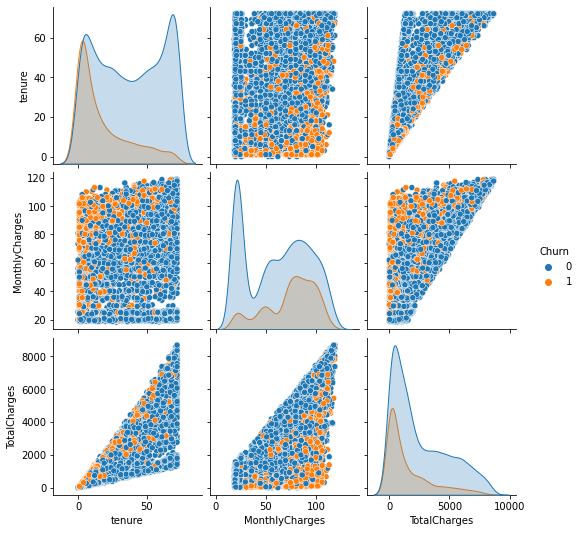

In [ ]:
sns.pairplot(data= df1[['tenure' , 'MonthlyCharges' , 'TotalCharges', 'Churn']], hue= 'Churn')


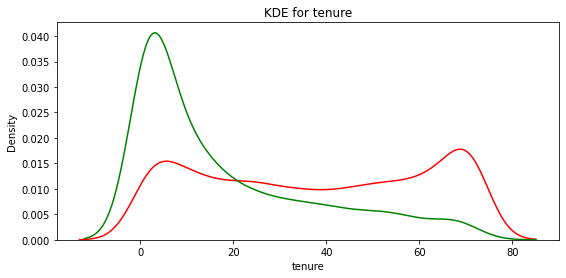

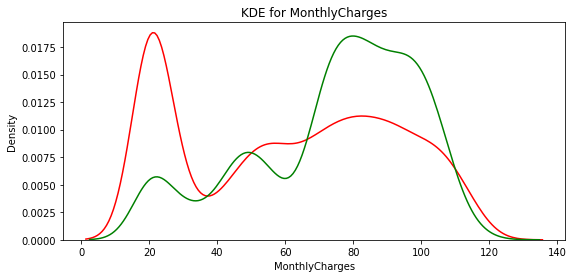

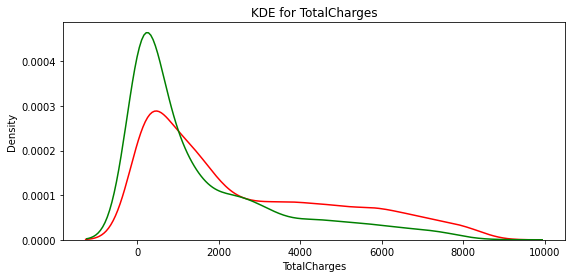

In [ ]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df1[df1['Churn'] == 0][feature].dropna(), color= 'red', label= 'Churn: No')
    ax1 = sns.kdeplot(df1[df1['Churn'] == 1][feature].dropna(), color= 'green', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')


**Looking into our target variable 'Churn'**

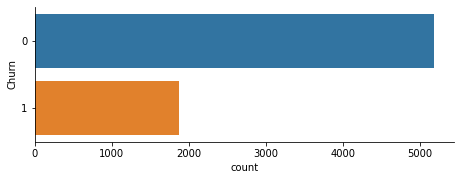

In [ ]:
ax = sns.catplot(y="Churn", kind="count", data=df1, height=2.6, aspect=2.5)


In [ ]:
print("Customers that will not Churn:  ", df1[df1['Churn'] == 0].shape[0] / df1.shape[0])
print("Customers that will Churn:      ", df1[df1['Churn'] == 1].shape[0] / df1.shape[0])


Customers that will not Churn:   0.7346301292063041
Customers that will Churn:       0.2653698707936959


We have a slightly imbalanced dataset with 26.5% of datapoints giving us information on clients that churn and 73.5% of datapoints not churning.

#**Feature Selection**

For feature selection we look at the correlation matrix and see what is correlated with churn and what is not. We aim to identify the best subset of predictors through this method.

In [ ]:
#basic correlation matrix
df1_corr= df1.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

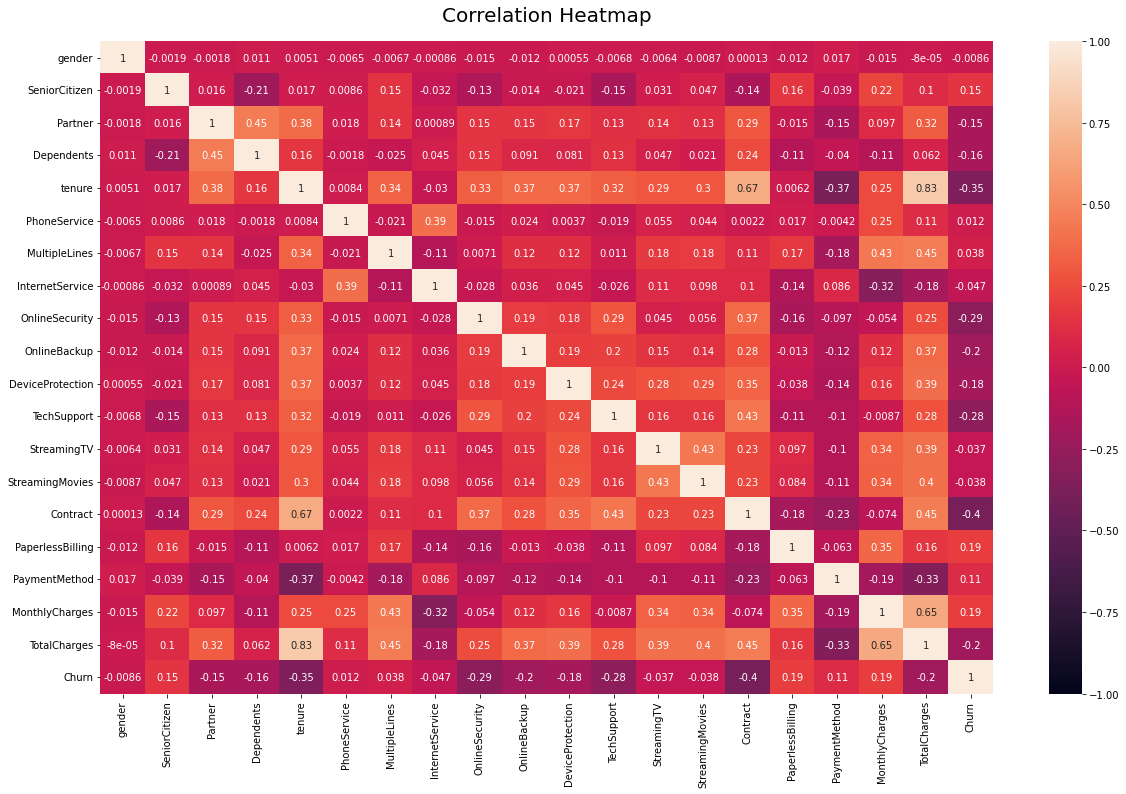

In [ ]:
# show seaborne heatmap for easier comprehension
plt.figure(figsize=(20, 12 ))
heatmap = sns.heatmap(df1_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=20)

From the heatmap, we can expect to see the correlation between each variable. For example, there is a strong negative correlation between payment method and tenure, which is -0.35. We can also see a slightly positive correlation between Churn and MonthlyCharges of 0.19.

But we can evaluate better if we single out **Churn**.

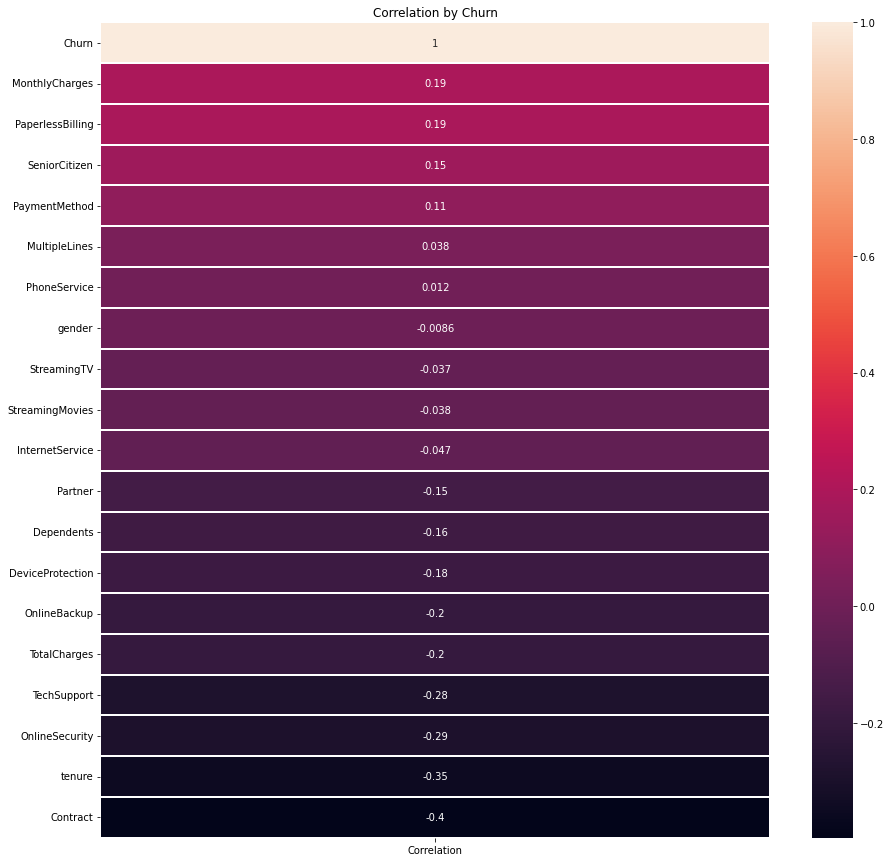

In [ ]:
#single out Churn for feature selection
corr = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (15,15))
sns.heatmap(corr,annot = True,linewidths = 1);
plt.title('Correlation by Churn');

* From the Correlation matrix, we can observe that **TechSupport, OnlineSecurity, tenure, and contract** are the factors showing the strongest negative and positive correlation with Churn.

* We decided to drop every variable with a correlation between -.1 or +.1, as they do not display any kind of correlation. Hence, we can conclude that these variables most probably have no relation to our **target variable Churn**.



In [ ]:
#check drop
df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65,1


#Split into test and train sets


In [ ]:
from sklearn.model_selection import train_test_split
X = df1.drop('Churn', axis=1) # separate X ...
y = df1['Churn'].copy()       # from y
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .2, random_state=0) #split all
train_X.shape, test_X.shape, train_y.shape, test_y.shape # check sizes

((5634, 13), (1409, 13), (5634,), (1409,))

We split 20% of the whole dataset as the testing data, and 80% are the training dataset.

#Prepare Preprocessing Pipeline

Firstly, we standardized the numeric attributes and transformed the categorical attributes.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

set_config(display='diagram')

#for numerical
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])
#for categorical
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False, drop="first"))
    ])
#combine
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_attribs = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_attribs = ['SeniorCitizen', 'Partner', 'Dependents','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','Contract', 'PaperlessBilling', 'PaymentMethod']

SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

preprocess_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['SeniorCitizen', 'Partner', 'Dependents',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [ ]:
# preprocess the training data
tr_X = preprocess_pipeline.fit_transform(train_X)
tr_y = train_y.values

# preprocess the test data
t_X = preprocess_pipeline.transform(test_X)
t_y = test_y.values

# check sizes
tr_X.shape, tr_y.shape, t_X.shape, t_y.shape

((5634, 20), (5634,), (1409, 20), (1409,))

* The *Training dataset* contains **5634 rows and 20 variables**.
* The *Testing dataset* contains **1409 rows and 20 variables**.
* The *Training dataset* of the target variables contains **1409 rows and 1 variable**.

#**Select and Train a Model**

We trained the following models:

* **Logistic Regression**
* **Random Forest Classifier**
* **Support Vector Machine**
* **Naive Bayes**
* **K - Nearest Neighbor**
* **XG-Boost**

We also made the **ROC Curve** and **Confusion Matrix** to better understand our model outputs and to see different metrics.





**1. Logistic Regression**

In [ ]:
# import the package
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score
lg_clf = LogisticRegression(random_state=0).fit(tr_X, tr_y)

In [ ]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg_clf, tr_X, tr_y, cv=5, scoring='balanced_accuracy')
lg_scores.mean().round(3)

0.729

The **Balanced Accuracy** of the *training dataset* is **72.9%**.

In [ ]:
y_pred = lg_clf.predict(t_X)
balanced_accuracy_score(t_y, y_pred)

0.7133060811093013

The **Balanced Accuracy** when testing with the *testing dataset* is **71.3306%**.

[[925 116]
 [170 198]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.63      0.54      0.58       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



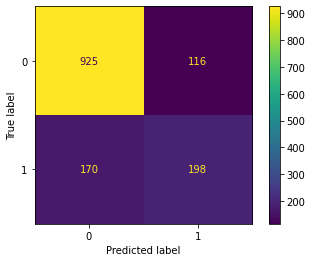

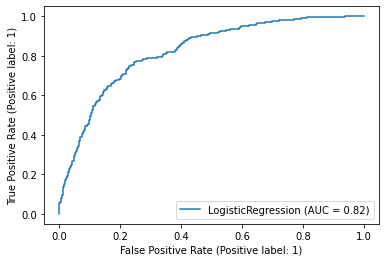

In [ ]:
# To construct a confusion matrix
import matplotlib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
cm = confusion_matrix(t_y, y_pred)
print(cm)
from sklearn.metrics import classification_report
print(classification_report(t_y, y_pred))
ConfusionMatrixDisplay.from_predictions(t_y, y_pred);
RocCurveDisplay.from_estimator(lg_clf, t_X, t_y);

Through the confusion matrix, the type 1 error is 170 observations. This implies that 170 customers we predicted to churn, but they did not actually churn (overestimation). The type 2 error is 116 observations i.e 116 customers did churn but they werent detected (underestimation).

The ROC curve shows a strong area under the curve with *0.82*, indicating that our model classifies positive and negative outcomes relatively well. There is a good tradeoff between False Positive and True Positive Rate among all thresholds.

The recall is relatively low with *.54*. However, this is the best value among our tested models.



In [ ]:
#lg_clf.coef_

**2.Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators = 100, max_depth= 5 , random_state=0)
forest_clf.fit(tr_X, tr_y)

RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
forest_scores = cross_val_score(forest_clf, tr_X, tr_y, cv=5, scoring='balanced_accuracy')
forest_scores.mean().round(3)

0.684

The **Balanced Accuracy** of the training dataset is 68.4%

In [ ]:
y_pred = forest_clf.predict(t_X)
balanced_accuracy_score(t_y, y_pred)

0.6614550703754751

The **Balanced Accuracy** of the *testing dataset* is  66.14%.

[[950  91]
 [217 151]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1041
           1       0.62      0.41      0.50       368

    accuracy                           0.78      1409
   macro avg       0.72      0.66      0.68      1409
weighted avg       0.76      0.78      0.77      1409



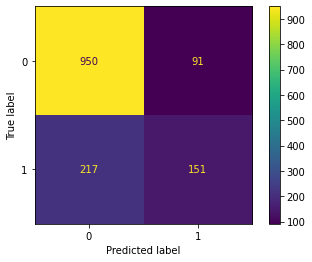

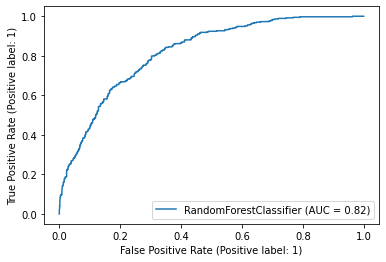

In [ ]:
cm = confusion_matrix(t_y, y_pred)
print(cm)
ConfusionMatrixDisplay.from_predictions(t_y, y_pred);
RocCurveDisplay.from_estimator(forest_clf, t_X, t_y);
print(classification_report(t_y, y_pred))

Through the confusion matrix, the type 1 error is 217 observations. This implies that 217 customers we predicted to churn, but they did not actually churn (overestimation). The type 2 error is 91 observations i.e 91 customers did churn but they werent detected (underestimation).

**3. SVM Classifier**

In [ ]:
from sklearn.svm import SVC

# just learn a separating line
lin_svc = SVC(C=1, kernel='poly', degree=1)
lin_svc.fit(tr_X, tr_y)

print(lin_svc.n_support_) # prints the numbers of support vectors for each class.
# See how number of support vectors change as you increase C.

[1314 1308]


In [ ]:
svc_scores = cross_val_score(lg_clf, tr_X, tr_y, cv=5, scoring='balanced_accuracy')
svc_scores.mean().round(3)

0.729

The **Balanced Accuracy** of the *training dataset* is 72.9%

In [ ]:
p_y = lin_svc.predict(t_X)
print('Test accuracy was', balanced_accuracy_score(t_y, p_y))

Test accuracy was 0.7026009689679655


The **Balanced Accuracy** of the *testing dataset* is 70.2%.

[[950  91]
 [217 151]]


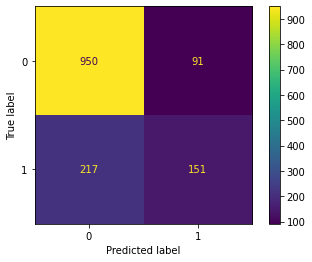

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1041
           1       0.62      0.41      0.50       368

    accuracy                           0.78      1409
   macro avg       0.72      0.66      0.68      1409
weighted avg       0.76      0.78      0.77      1409



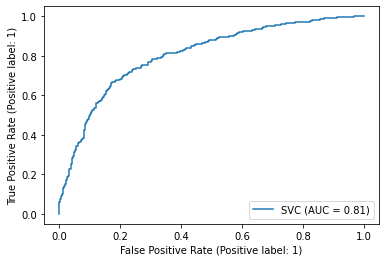

In [ ]:
cm = confusion_matrix(t_y, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lin_svc.classes_)
disp.plot()
plt.show()
RocCurveDisplay.from_estimator(lin_svc, t_X, t_y);
print(classification_report(t_y, y_pred))

Through the confusion matrix, the type1 error is 110 observations, which were rejected when it is actually true. This implies that we expected The type 2 error is 180 observations, which were actually false.

###**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_clf = gnb.fit(tr_X, tr_y)

In [ ]:
gnb_scores = cross_val_score(gnb_clf, tr_X, tr_y, cv=5, scoring='balanced_accuracy')
svc_scores.mean().round(3)

0.729

The **Balanced Accuracy** of the *training dataset* is 72.9%.

In [ ]:
y_pred = gnb_clf.predict(t_X)
balanced_accuracy_score(t_y, y_pred)

0.7273420206323351

The **Balanced Accuracy** of the *testing dataset* is 72.7%.

[[677 364]
 [ 72 296]]
              precision    recall  f1-score   support

           0       0.90      0.65      0.76      1041
           1       0.45      0.80      0.58       368

    accuracy                           0.69      1409
   macro avg       0.68      0.73      0.67      1409
weighted avg       0.78      0.69      0.71      1409



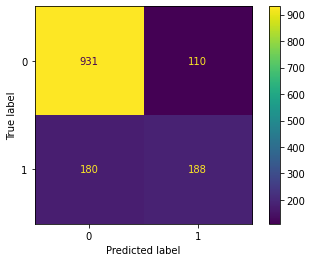

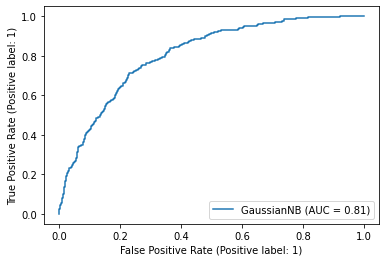

In [ ]:
cm = confusion_matrix(t_y, y_pred)
print(cm)
ConfusionMatrixDisplay.from_predictions(t_y, p_y);
RocCurveDisplay.from_estimator(gnb_clf, t_X, t_y);
print(classification_report(t_y, y_pred))

we want to focus on recall most as recall gives us the measurement of how many relevant elements out of the actual pos churn set


**4. K-nearest-neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh_clf = neigh.fit(tr_X, tr_y)


In [ ]:
neigh_scores = cross_val_score(neigh_clf, tr_X, tr_y, cv=5, scoring='balanced_accuracy')
neigh_scores.mean().round(3)

0.682

The **Balanced Accuracy** of the *training dataset* is 68.2%.

In [ ]:
y_pred = neigh_clf.predict(t_X)
balanced_accuracy_score(t_y, y_pred)

0.6435753664954267

The **Balanced Accuracy** of the *testing dataset* is 64.35%.

[[876 165]
 [204 164]]


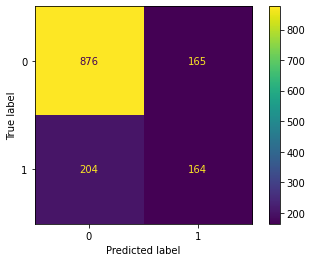

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1041
           1       0.50      0.45      0.47       368

    accuracy                           0.74      1409
   macro avg       0.65      0.64      0.65      1409
weighted avg       0.73      0.74      0.73      1409



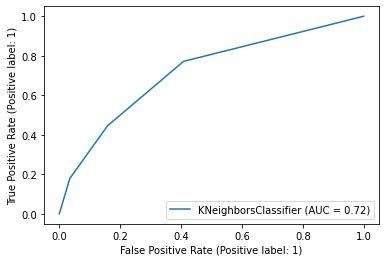

In [ ]:
cm = confusion_matrix(t_y, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= neigh_clf.classes_)
disp.plot()
plt.show()
print(RocCurveDisplay.from_estimator(neigh_clf, t_X, t_y))
print(classification_report(t_y, y_pred))

The test predictive recall is 51% (188/368) and the model's precision is 63% (188/298)

**5. XGBoost Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(tr_X, tr_y)

In [ ]:
xgb_scores = cross_val_score(xgb_clf, tr_X, tr_y, cv=5, scoring='balanced_accuracy')
xgb_scores.mean().round(3)

0.716

The *training dataset* balanced accuracy is 71.6%.

In [ ]:
y_pred = xgb_clf.predict(t_X)
balanced_accuracy_score(t_y, y_pred)

0.7071573633212213

The *testing dataset* balanced accuracy is 70.7%.

[[932 109]
 [177 191]]


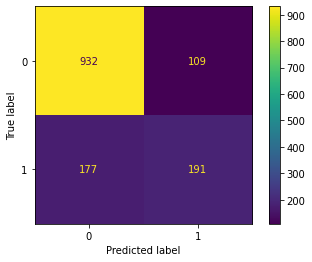

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



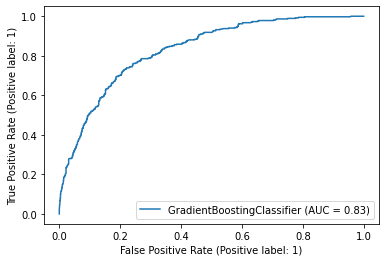

In [ ]:
cm = confusion_matrix(t_y, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= xgb_clf.classes_)
disp.plot()
plt.show()
print(RocCurveDisplay.from_estimator(xgb_clf, t_X, t_y))
print(classification_report(t_y, y_pred))

The test predictive recall is 51% (188/368) and the model's precision is 63% (188/298)

**Interpretation of Results**



*   How did the models perform?
*   What is important in our case?
*   Which one did we choose?



From the various models we ran, **Logistic Regression** and **XGBoost** gave us the most desired results.
The Balanced Accuracy score and the Recall were the metrics we focussed on, we also looked at the ROC curve to come to this conclusion.

###**Logistic Regression** :
* *Recall* : 0.54
* *Precision* : 0.63
* *Balanced Accuracy* of Training Dataset **72.9%**.
* *Balanced Accuracy* of Test Dataset **71.3306%**
* *AUC* : 0.82
* *Confusion Matrix* : [[925 116][170 198]]






#**Fine Tune Model Hyperparameter**

We fine tune our model with grid, random, and halving random search

**Hyperparameter Tuning for Logistic Regression**

We used the Penalty and C parameters
*   Regularization (penalty).

*   The C parameter controls the penality strength, which can be effective.




First, we use **tuning** to find best balanced accuracy, then we focus on **maximizing** Recall

We run to different parameter tuning models, the Grid Search with the highest mean test score with 0.729315.

**Grid Search**

GridSearchCV implements a “fit” and a “score” method.
It is an exhaustive search over specified parameter values for an estimator.

The important members are fit and predict.

In [ ]:
#MAX BALANCED ACCURACY
from sklearn.model_selection import GridSearchCV

#Instantiate
lg_clf = LogisticRegression(solver = 'saga')

#Grid
parameter_grid = {'C': [0.01, 0.1, 1, 2, 10, 100], 'penalty': ['l1', 'l2']}

#Gridsearch
gridsearch = GridSearchCV(lg_clf, parameter_grid, scoring='balanced_accuracy')
gridsearch.fit(tr_X, tr_y);

#Get best hyperparameters
gridsearch.best_params_
cv_res = pd.DataFrame(gridsearch.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.044076,0.005872,0.001487,0.000037,1,l2,"{'C': 1, 'penalty': 'l2'}",0.753005,0.715570,0.723936,0.715370,0.738697,0.729315,0.014571,1
7,0.043148,0.001852,0.001474,0.000016,2,l2,"{'C': 2, 'penalty': 'l2'}",0.753005,0.714966,0.723331,0.714764,0.738091,0.728831,0.014768,2
8,0.059220,0.003712,0.001502,0.000075,10,l1,"{'C': 10, 'penalty': 'l1'}",0.754672,0.714966,0.721665,0.714764,0.738091,0.728831,0.015459,2
9,0.045463,0.006480,0.002059,0.001102,10,l2,"{'C': 10, 'penalty': 'l2'}",0.754672,0.714966,0.721665,0.714764,0.738091,0.728831,0.015459,2
10,0.059465,0.004046,0.001477,0.000027,100,l1,"{'C': 100, 'penalty': 'l1'}",0.754672,0.714966,0.721665,0.714764,0.738091,0.728831,0.015459,2


**Randomized Search**

RandomizedSearchCV also implements a “fit” and a “score” method. It also implements other functions if they are implemented in the estimator used.
The parameters are optimized by cross-validated search.

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is taken from the specified distributions.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
model = LogisticRegression(solver = 'saga')

param_distribs = {'C': loguniform(1e-2, 100), 'penalty': ['l1', 'l2']}

random_search = RandomizedSearchCV(model, param_distribs , n_iter=20, cv=3, scoring='balanced_accuracy', random_state=0)

random_search.fit(tr_X, tr_y)
random_search.best_estimator_
cv_res = pd.DataFrame(random_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
18,0.039045,0.000679,0.001746,0.000136,60.072495,l2,"{'C': 60.07249475906195, 'penalty': 'l2'}",0.724573,0.72621,0.725427,0.725404,0.000669,1
7,0.052304,0.004215,0.001649,0.000019,17.728619,l1,"{'C': 17.72861933751491, 'penalty': 'l1'}",0.724573,0.72621,0.725427,0.725404,0.000669,1
9,0.053403,0.002179,0.001682,0.000014,22.096071,l1,"{'C': 22.096070868729548, 'penalty': 'l1'}",0.724573,0.72621,0.725427,0.725404,0.000669,1
1,0.040922,0.002055,0.001654,0.000019,23.82665,l2,"{'C': 23.826650493636627, 'penalty': 'l2'}",0.724573,0.72621,0.725427,0.725404,0.000669,1
12,0.039950,0.004276,0.001650,0.000010,12.960657,l2,"{'C': 12.960656597279723, 'penalty': 'l2'}",0.724573,0.72621,0.725427,0.725404,0.000669,1


The Randomized Search's highest mean test score is 0.725404.

**Fit best parameters to model**

In [ ]:
lg_clf = LogisticRegression(random_state=0, C = 1, penalty = 'l2' ).fit(tr_X, tr_y)
y_pred = lg_clf.predict(t_X)
balanced_accuracy_score(t_y, y_pred)

0.7133060811093013

The outcome of grid search hyperparameter tuning suggests to use the same default parameter values that we used above. Thats the reason why we are getting the same balanced accuracy measure for this model.

# **Cost Matrix to adjust model threshold**

In our case, it is extremely important that we catch all true positives with our model. From a business standpoint, we do not care to falsely label some customers that do not actually churn, if we catch all the customers that actually churn. To show how we would tackle this problem, we adjusted our model threshold using cost assumptions for different model classifications

**Assumptions:**

* If a customer cannot be identified and churns, the acquisition of a new customer costs us the cost of a "one-month-free" offer costing the business $25

* If a customer is identified and will be likely to churn, but did not yet churn. Our business will be able to retain the customer with a 10$ promotion and altering/updating contract terms with equivalent value.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import cross_val_score
def default_cost(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  return cm[1,0] * 25 + cm[0,1] * 10

model = LogisticRegression(solver = 'saga')

cost_scorer = make_scorer(default_cost, greater_is_better=False)

lg_costs = cross_val_score(model, tr_X, tr_y, cv=3, scoring=cost_scorer)
lg_costs.mean()

grid_search = GridSearchCV(model, parameter_grid, cv=3, scoring=cost_scorer)
grid_search.fit(tr_X, tr_y)

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
8,0.055997,0.007794,0.001537,0.000013,10,l1,"{'C': 10, 'penalty': 'l1'}",-7015.0,-6960.0,-7020.0,-6998.333333,27.182511,1
9,0.039434,0.003939,0.001571,0.000061,10,l2,"{'C': 10, 'penalty': 'l2'}",-7025.0,-6985.0,-7020.0,-7010.000000,17.795130,2
10,0.048873,0.002655,0.004178,0.003758,100,l1,"{'C': 100, 'penalty': 'l1'}",-7025.0,-6985.0,-7030.0,-7013.333333,20.138410,3
11,0.036556,0.002617,0.001525,0.000007,100,l2,"{'C': 100, 'penalty': 'l2'}",-7025.0,-6985.0,-7030.0,-7013.333333,20.138410,3
6,0.060748,0.017105,0.001563,0.000033,2,l1,"{'C': 2, 'penalty': 'l1'}",-7065.0,-6975.0,-7010.0,-7016.666667,37.043518,5


In [ ]:
# We'll work with the best model obtained from grid search.
model = grid_search.best_estimator_

# What is the cost if we just applied that to the test data we set aside at near the beginning?
print('The cost under standard prediction strategy is %d.' % default_cost(t_y, model.predict(t_X)))

The cost under standard prediction strategy is 5410.


In [ ]:
#Tuning Threshold

def predict_labels(pos_probs, threshold):
	return np.where(pos_probs >= threshold, 1, 0)

#classifier's estimated probability
class_probabilities = model.predict_proba(t_X)
probs = class_probabilities[:, 1]

#Define thresholds on positive outcomes at which to evaluate
thresholds = np.arange(0, 1, 0.001)

#evaluate each threshold
scores = [default_cost(t_y, predict_labels(probs, t)) for t in thresholds]

#get best threshold
ix = np.argmin(scores)
#print cost
print('After optimization, threshold should be set at %.3f, \
	which will lead to cost of misclassification of %d.' % (thresholds[ix], scores[ix]))

After optimization, threshold should be set at 0.301, 	which will lead to cost of misclassification of 4715.


In [ ]:
(4715/5410)-1

-0.1284658040665434

**Interpreting Logistic Regression Result**


In [ ]:
#wait for Nachi

# **Conclusion**

We can conclude that some of the strongest predictors for Churn are features x,y,z with intercepts of xyz. We can therefore recommend to our telecom business to further look into the features with significant coeficients, to effictively and preemptively tackle churn.



However, the main value of our project lies within the accurate prediction. We deliver a model that somehwat accurately projects churn and then gives our marketig people a way of intercepting records that are about to churn and retain them with specific offers.


Out of six different algorithms, we ended up using the logistic regression model, fine tune its parameter, and then applying a cost matrix.


Our hypothetical cost exercise shows the potential cost savings of this exercise. With a sample size of just 1409 in our test set, we save approx. $700 dollars. Although this is a hypothetical example, it shows the tremendous cost savings our model can provide.